In [20]:
import pandas as pd



In [21]:
df = pd.read_csv("forbes_2022_billionaires.csv")
df.head()
#Data preprocessing




,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [22]:
#The understanding stage is where we attempt to explore the data.
# Let's take a look at the shape of dataset with the shape attribute.

df.shape

(2668, 22)

In [23]:

#As you can see, the dataset has 2668 rows and 22 columns. Let me show you the type of columns with the dtypes attribute.

df.dtypes

rank                      int64
personName               object
age                     float64
finalWorth              float64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

In [24]:
#The dataset contained both numerical and categorical values. Let's select the columns I'm going to use in this data analysis with the loc method.

df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]
df.head()


,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [25]:
df = df.set_index("rank")
df.head()

df.isnull().sum()


personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

In [27]:
#As you can see, there are missing data in the age, country, and gender columns.
# Since there are not many missing data in these columns, let's remove these missing data with the dropna method.

df.dropna(inplace=True)


In [29]:
#Let's take a look at the general information in the dataset with the info method.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2568 entries, 1 to 2578
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   personName  2568 non-null   object 
 1   age         2568 non-null   float64
 2   finalWorth  2568 non-null   float64
 3   category    2568 non-null   object 
 4   country     2568 non-null   object 
 5   gender      2568 non-null   object 
dtypes: float64(2), object(4)
memory usage: 140.4+ KB


In [30]:
#As you can see, the dataset consists of 2568 rows and 6 columns and there is no missing data in the dataset.


#Gender analysis

#Let's examine the gender of billionaires with the value_counts method.

df["gender"].value_counts()


gender
M    2282
F     286
Name: count, dtype: int64

In [32]:
#As you can see, the dataset consists of 2568 rows and 6 columns and there is no missing data in the dataset.


#Gender analysis

#Let's examine the gender of billionaires with the value_counts method.

df["gender"].value_counts()


gender
M    2282
F     286
Name: count, dtype: int64

In [34]:
##Most billionaires are men. Let's look at the percentage of men and women
# with the normalize =True parameter.

df["gender"].value_counts(normalize=True)



gender
M    0.888629
F    0.111371
Name: proportion, dtype: float64

In [35]:
#As you can see, 89 percent of billionaires are men and 11 percent are women.
# Let's look at the mean ages according to gender. To do this, I'm going to use the groupby method.

df_gender = df.groupby(["gender"])


In [36]:
#Let's calculate the mean ages with the mean method.

df_gender["age"].mean()


gender
F    62.937063
M    64.409290
Name: age, dtype: float64

In [37]:
#As can be seen, the average age of men is 64, and the average age of women is 63.
# Let's draw a bar plot for the male and female averages. First, let me specify a seaborn theme.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.figsize":(12,8), "figure.dpi":300})


In [38]:
#I'm going to use the warnings package to avoid seeing the warning messages.

import warnings
warnings.filterwarnings("ignore")


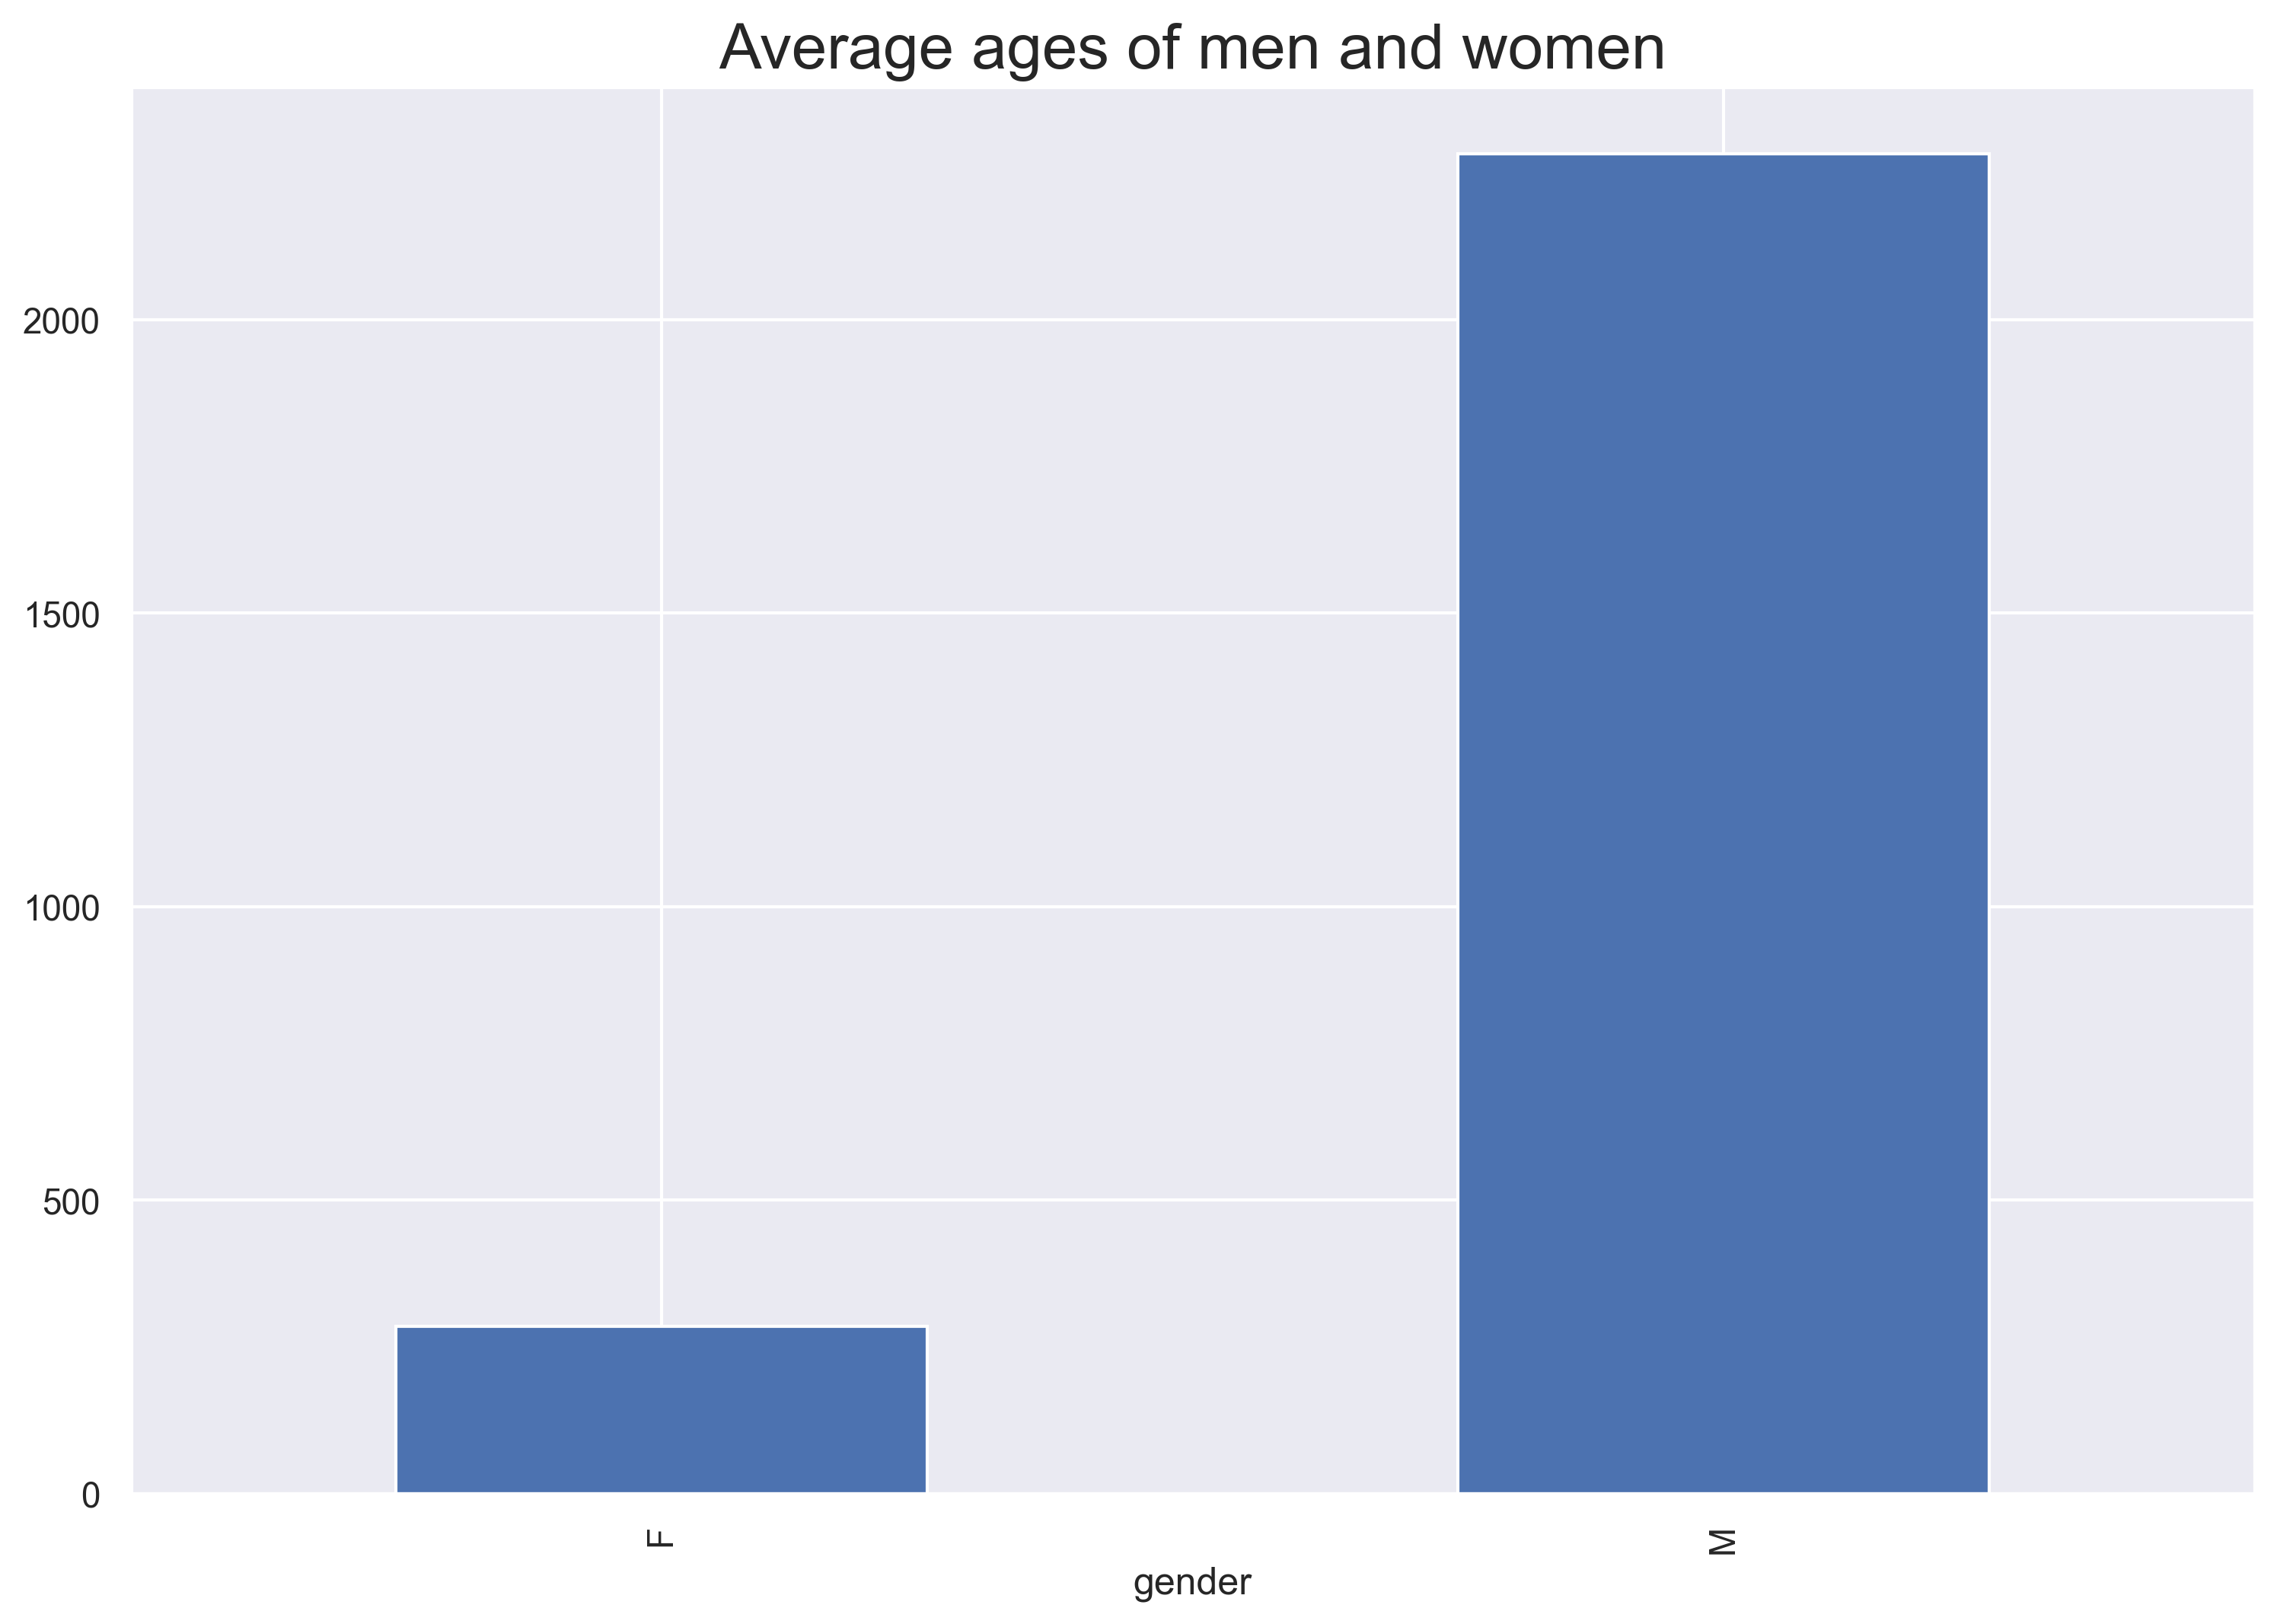

In [40]:
#Let's draw the bar plot with the plot method.

df_gender.size().plot(kind = "bar")
plt.title('Average ages of men and women', fontsize = 20)
plt.show()


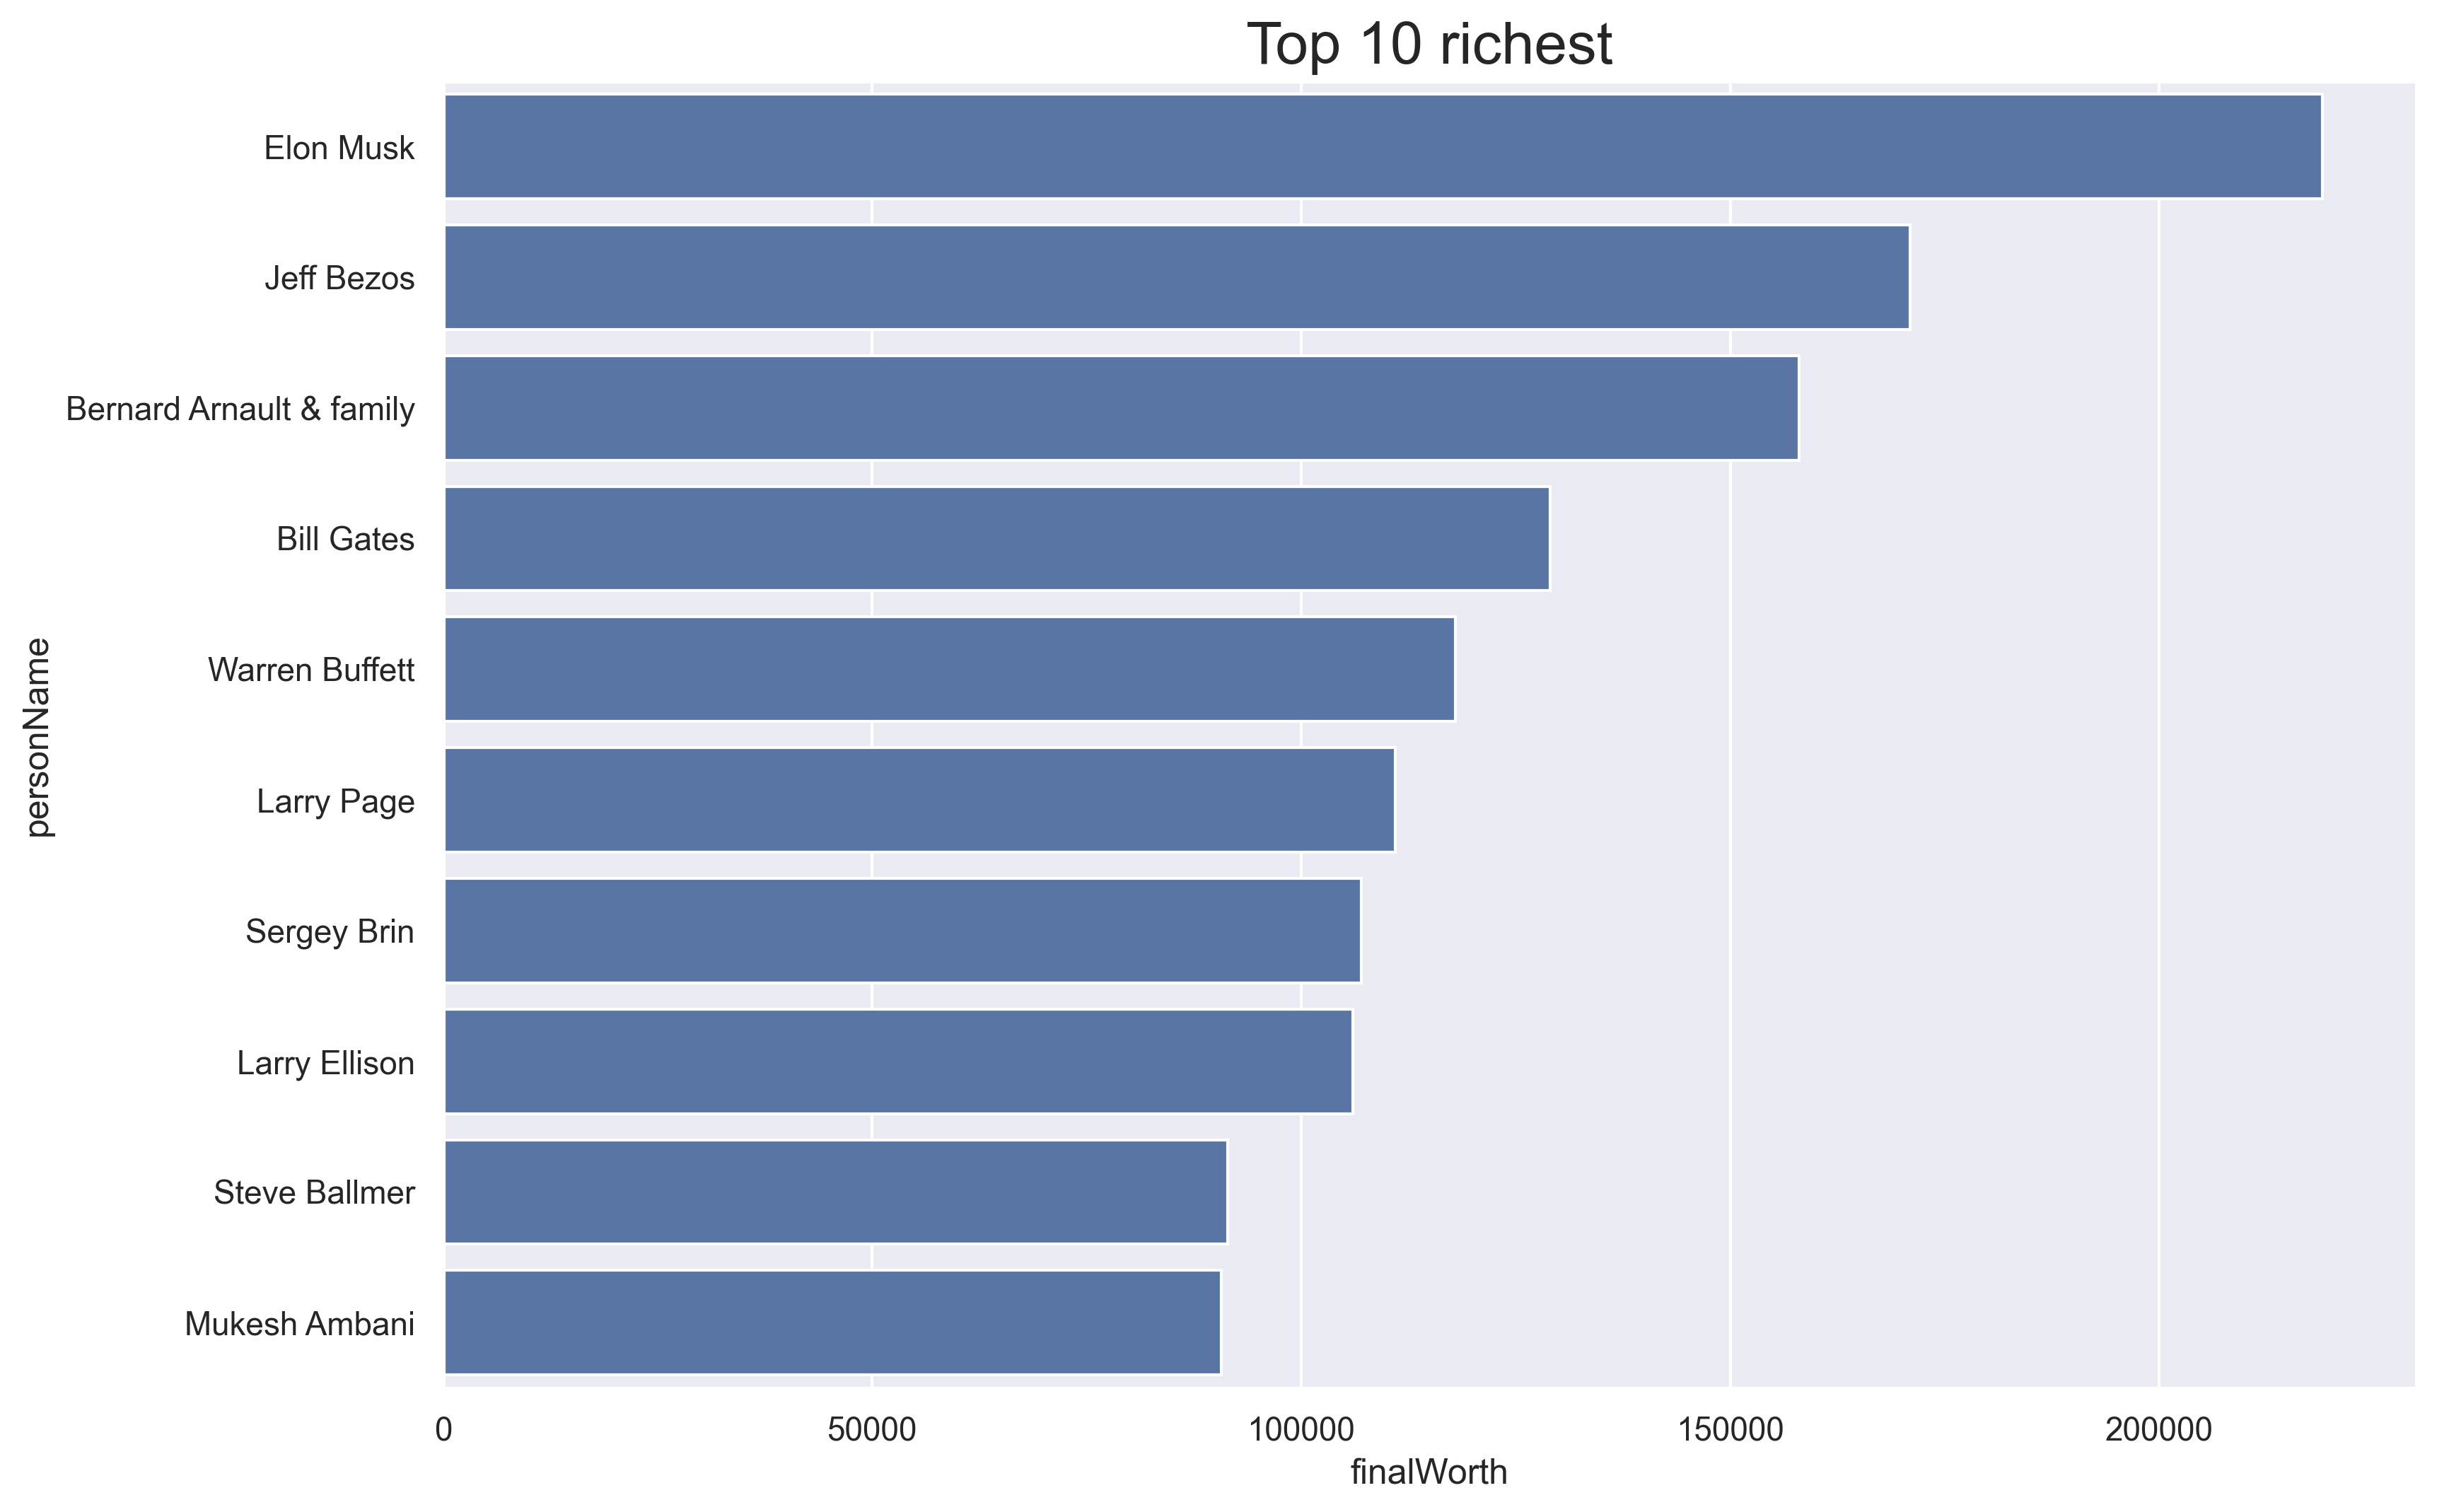

In [41]:
#Top 10 richest

#To see top 10 richest in the world, let me use the barplot method in seaborn.

sns.barplot(y=df["personName"][:10], x = df["finalWorth"][:10])
plt.title('Top 10 richest', fontsize = 20)
plt.show()

In [42]:
#The richest person in the world, Elon Musk, then Jeff Bezos.


#Top 10 countries

#Let's take a look at countries with the most billionaries.
# First, let me calculate how many unique countries there are with the len method.

len(df["country"].unique())

73

In [43]:
#There are 73 countries in the list. To draw a bar plot of the first ten countries that have the most billionaires, let's group the dataset according to the country column with the groupby method.

df_country = df.groupby("country")


In [44]:
#Let's calculate the number of billionaires by country with the size method,
# and then sort the countries with the most billionaires with sort_values and transform
# this data into a dataframe with the DataFrame method.

df_country_count = pd.DataFrame(
    df_country.size().sort_values(ascending=False), columns=["Count"])
df_country_count.head()


,Count
country,
United States,742
China,546
India,154
Germany,94
United Kingdom,81


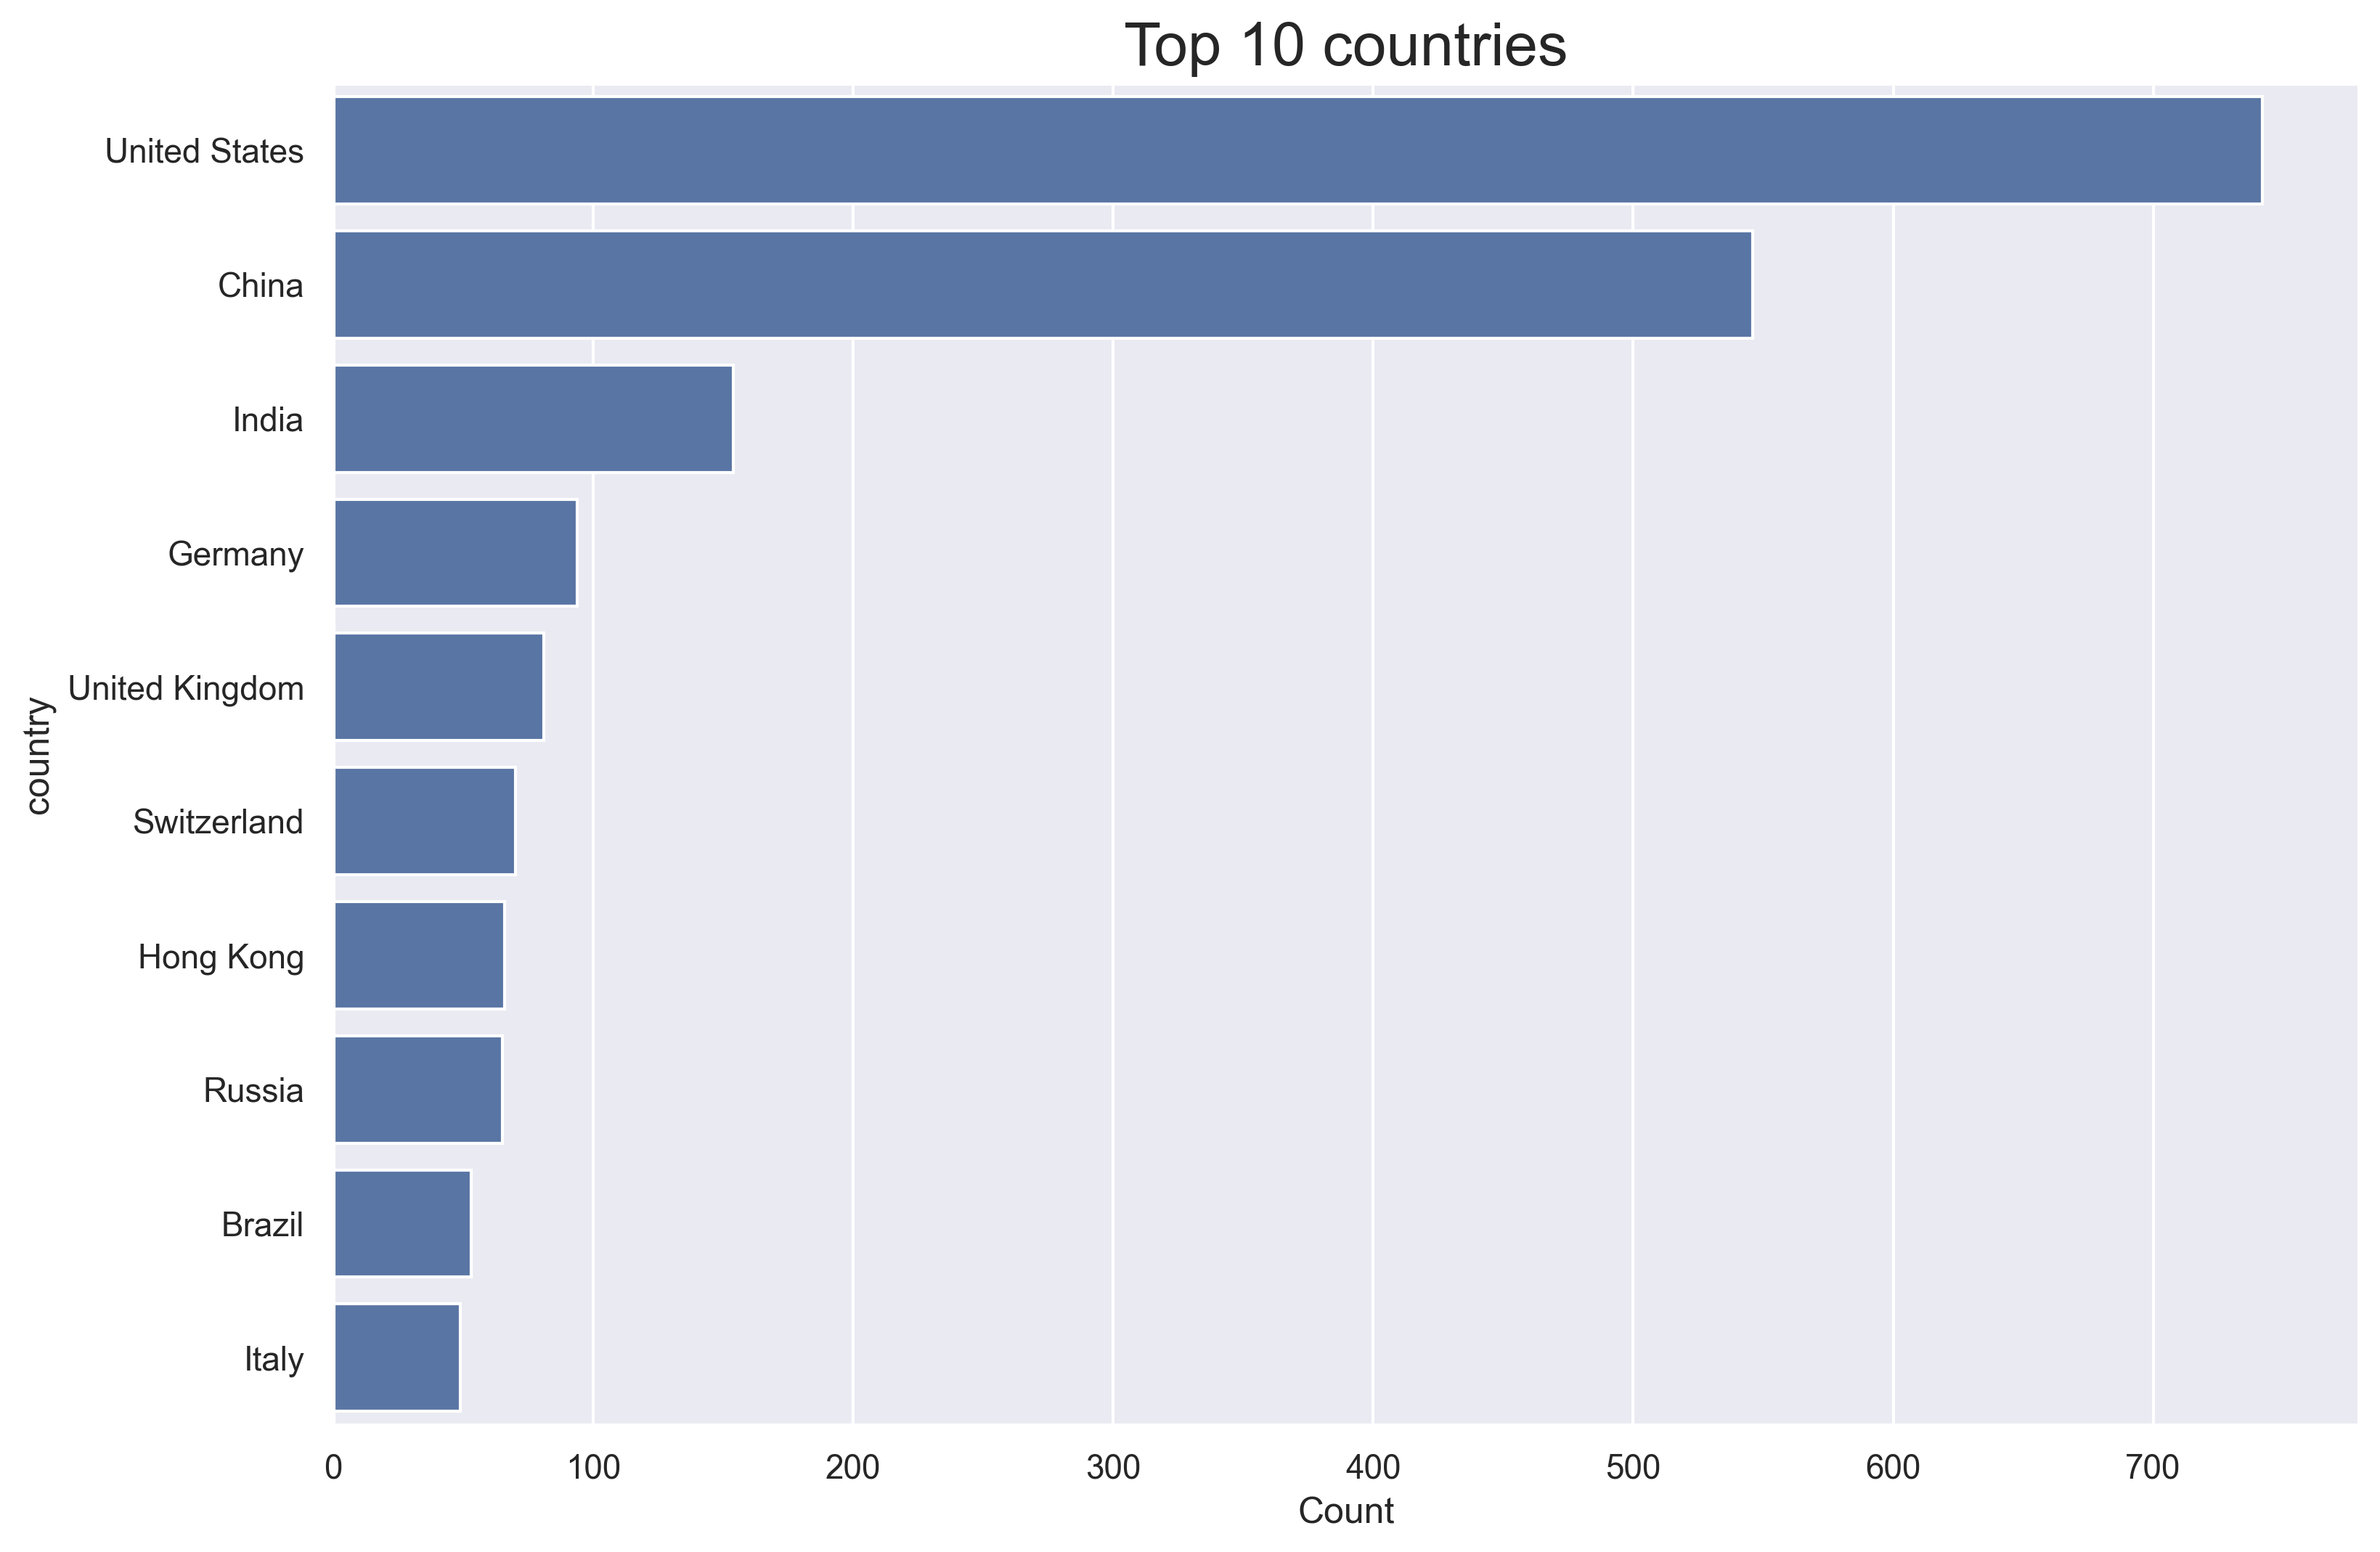

In [65]:
#Now let's draw a bar plot for the first ten countries.

sns.barplot(x = df_country_count["Count"][:10], y =df_country_count.index[:10])
plt.title('Top 10 countries', fontsize = 20)
plt.show()


In [49]:
#As you can see, the first country with the most billionaires is the United States,
# followed by China, etc.

#Let me look at unique categories with the unique method.

df["category"].unique()


array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [50]:
#Let me remove spaces from the columns and replace & with _ with the replace method.

df["category"]=df["category"].apply(lambda x:x.replace(" ","")).apply(lambda x:x.replace("&","_"))


In [52]:
#Let's look at unique categories with the unique method again.


df["category"].unique()


array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [53]:
#Let's find the number of categories. To do this, I'm going to first use the groupby method and then the size method.

df_category = df.groupby("category").size()
df_category.head()

category
Automotive                   66
Construction_Engineering     45
Diversified                 174
Energy                       93
Fashion_Retail              238
dtype: int64

In [54]:
#Let me convert this data into a dataframe.

df_category = df_category.to_frame()
df_category.head()


,0
category,
Automotive,66
Construction_Engineering,45
Diversified,174
Energy,93
Fashion_Retail,238


In [55]:
#Let's name the first column with the rename method and sort the values by the number of categories with the sort_values method.

df_category=df_category.rename(columns = {0:"Count"}).sort_values(by = "Count", ascending=False)
df_category.head()


,Count
category,
Finance_Investments,381
Technology,332
Manufacturing,319
Fashion_Retail,238
Healthcare,209


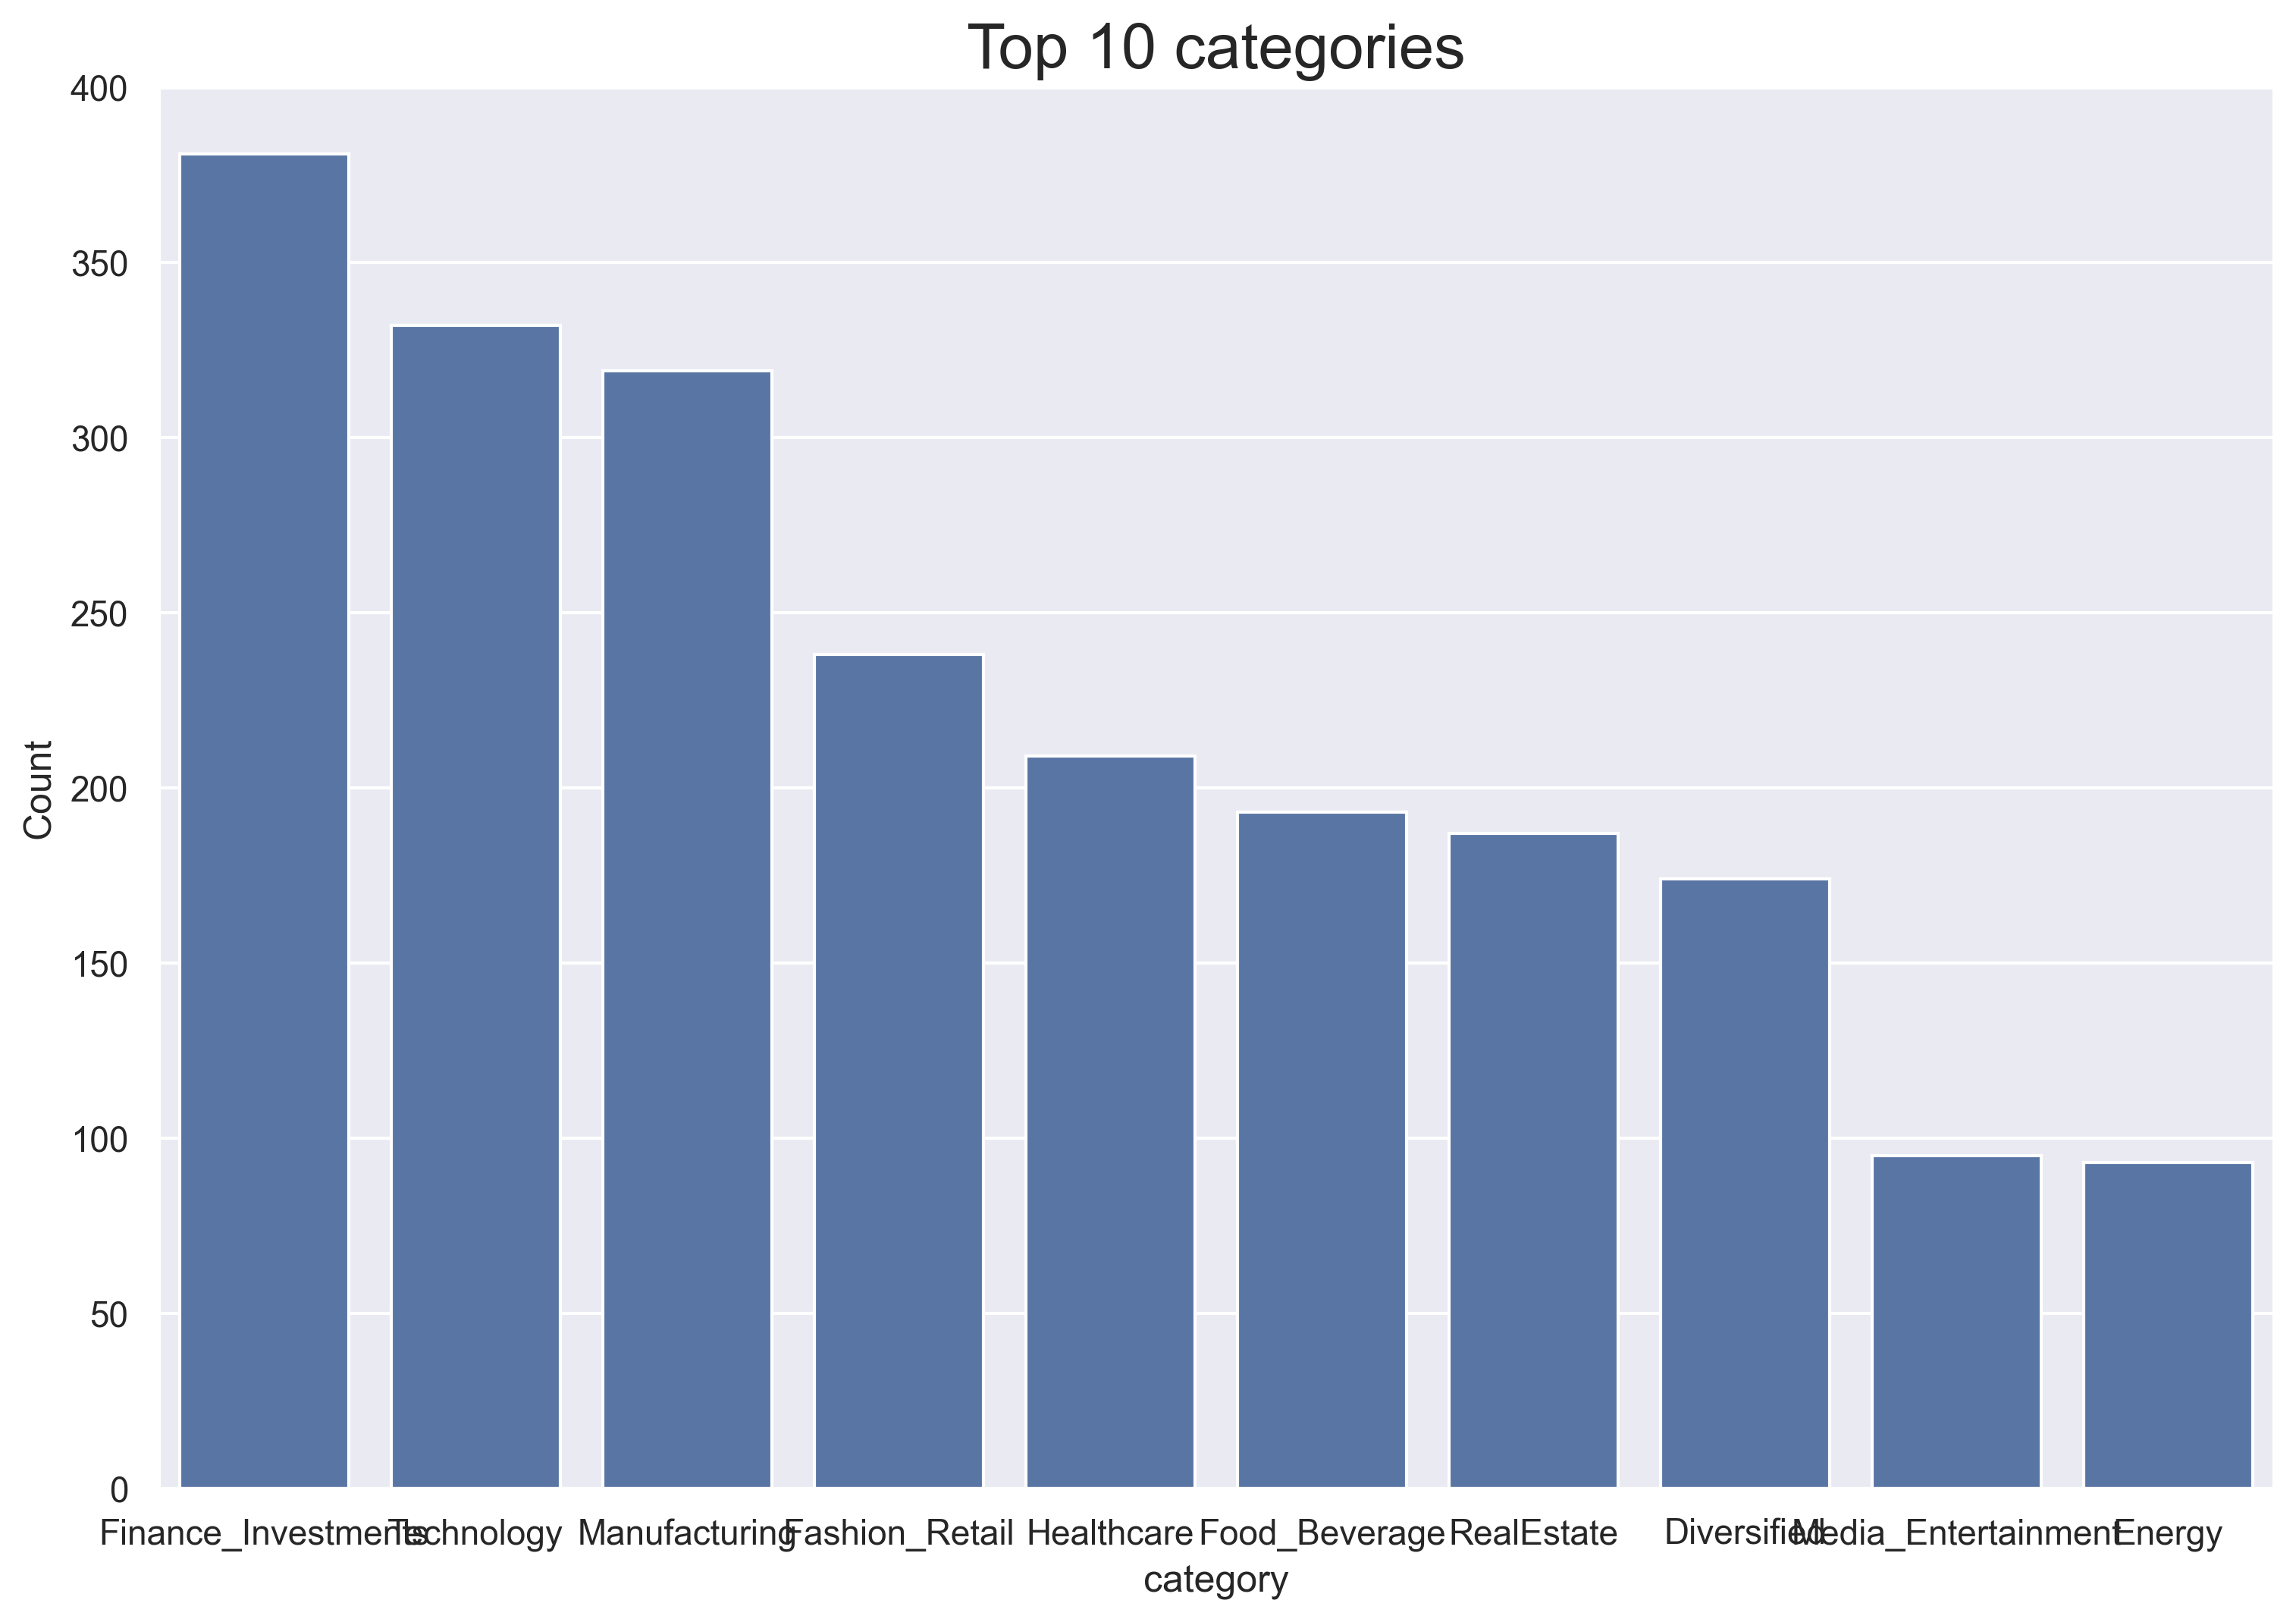

In [64]:
#Let's draw a bar plot of the first ten columns.

sns.barplot(x=df_category.index[:10], y=df_category["Count"][:10])

plt.title('Top 10 categories', fontsize = 20)
plt.show()


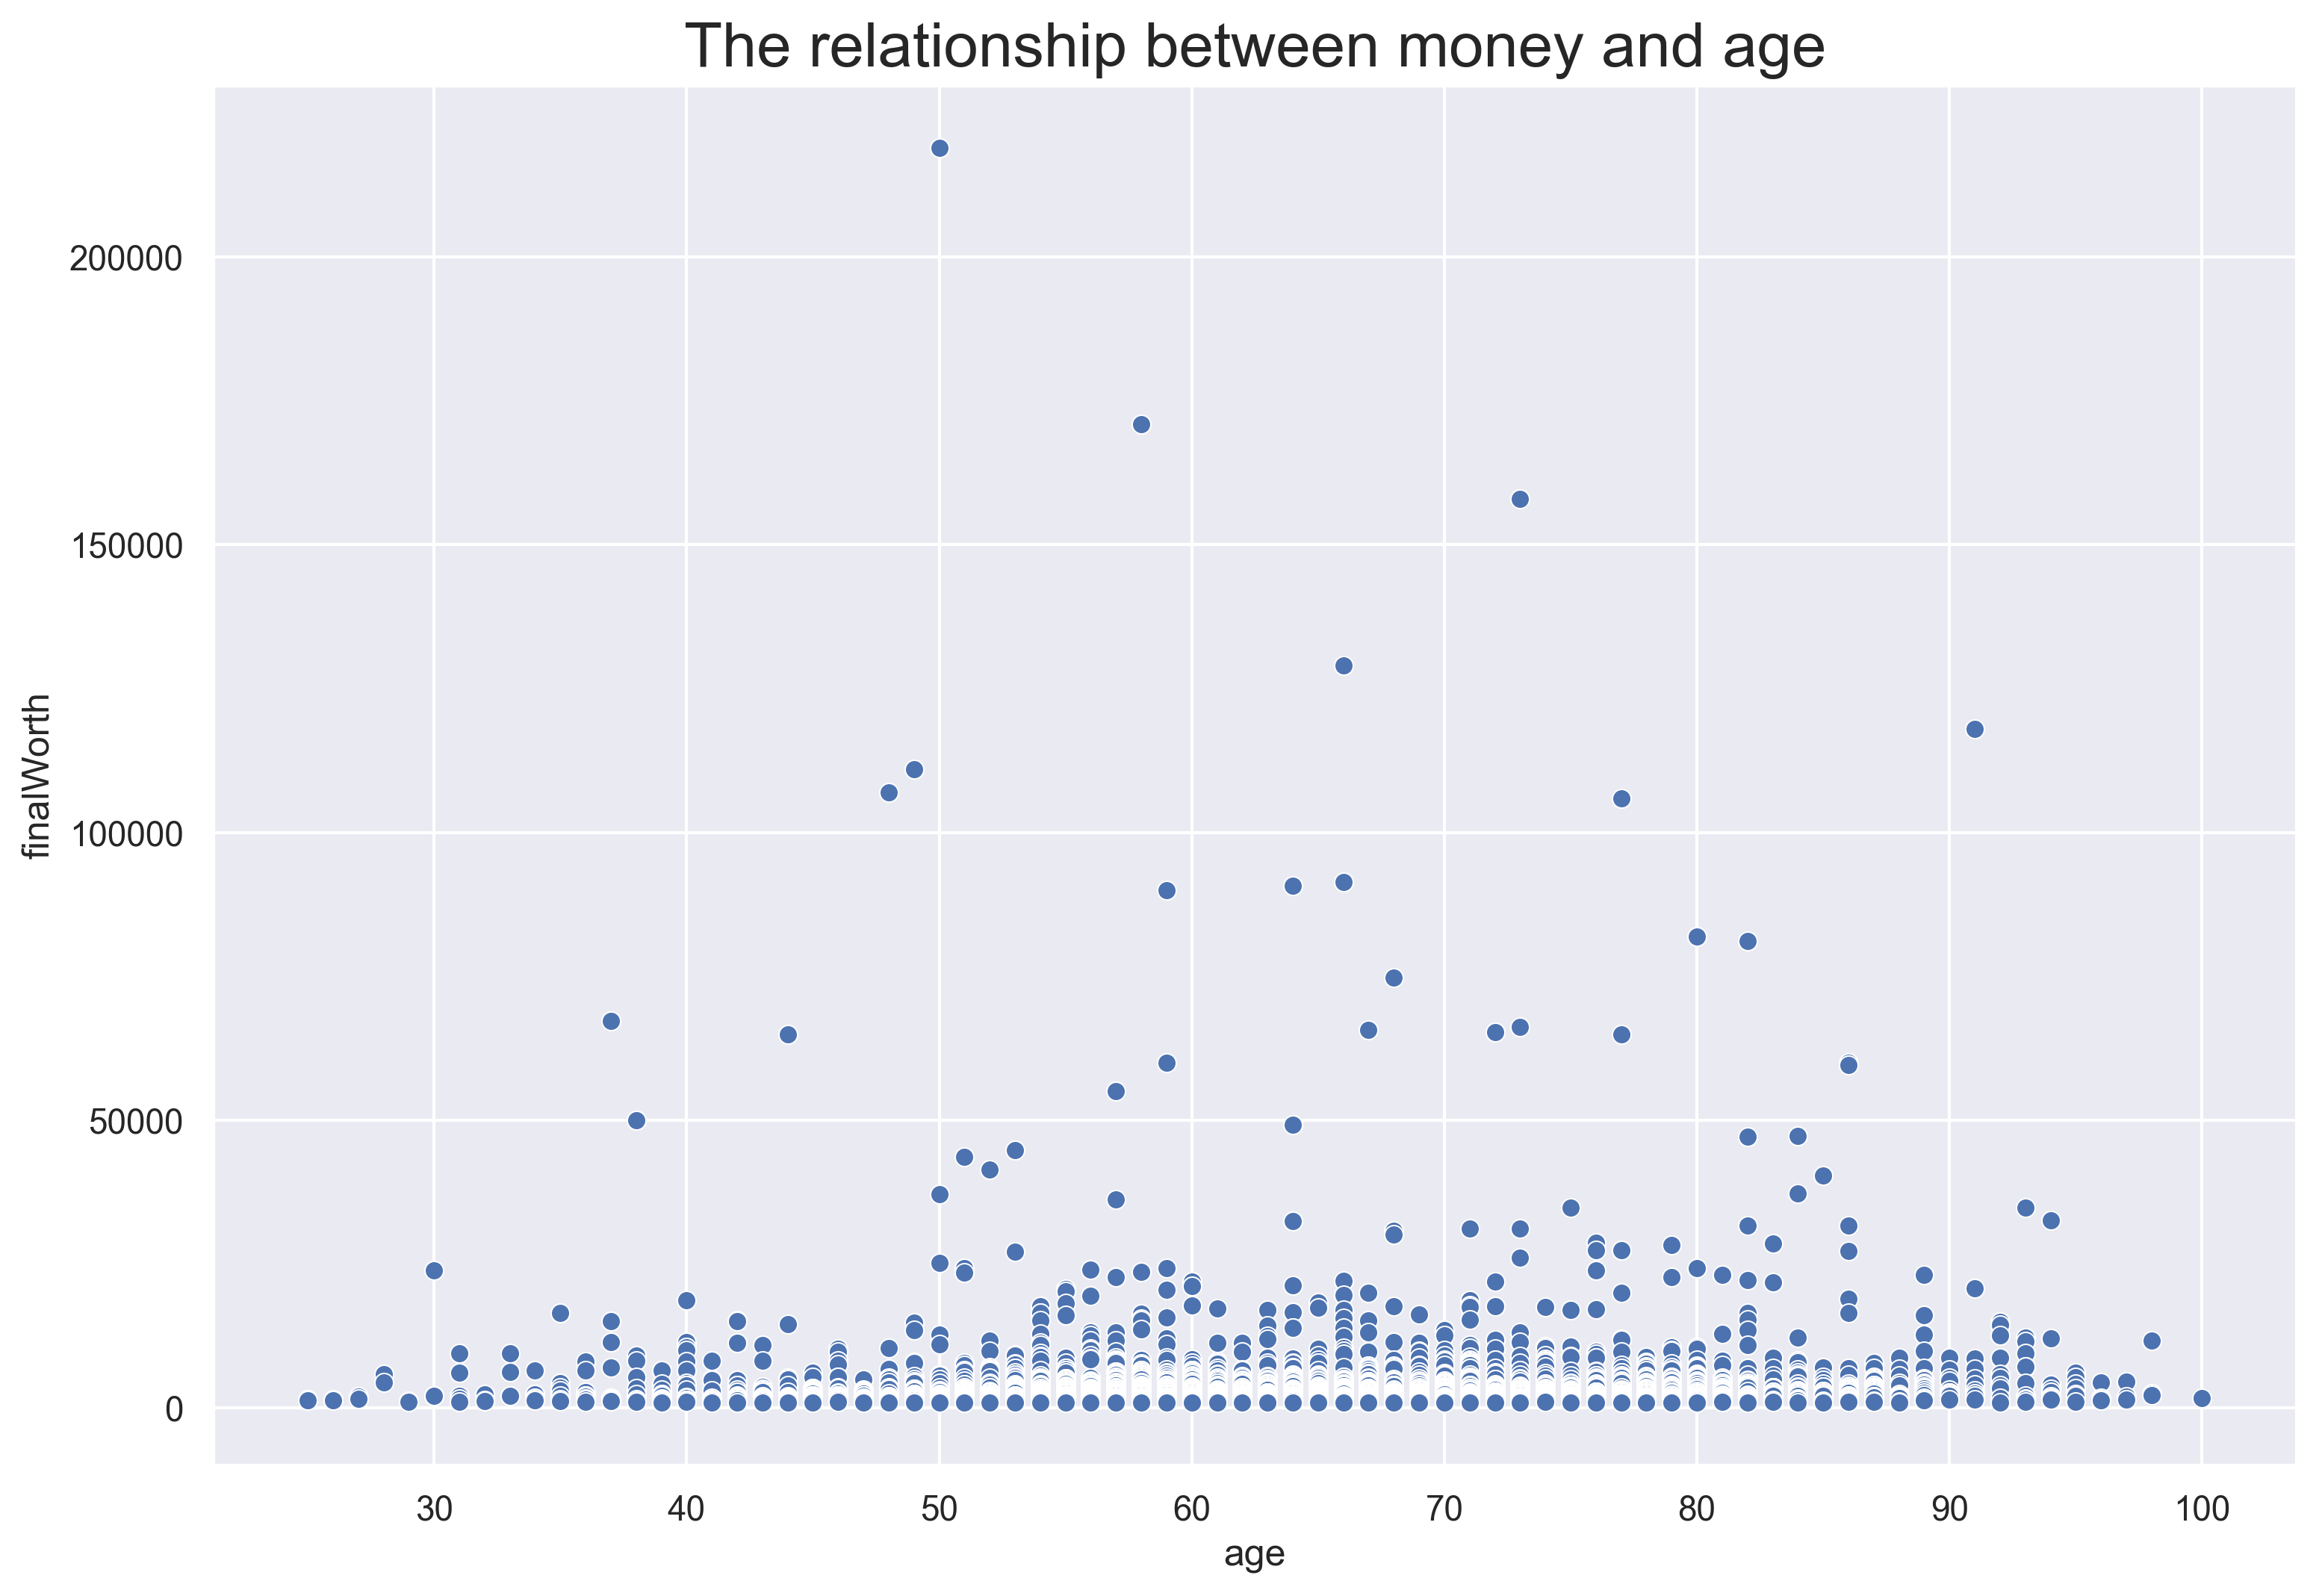

In [68]:
#The category that have the most billioneires is finance investments, followed by technology, etc.


#The relationship between money and age

#Let's look at the relationship between money and age with scatterplot method.

sns.scatterplot(x=df["age"],y=df["finalWorth"])
plt.title('The relationship between money and age', fontsize = 20)
plt.show()


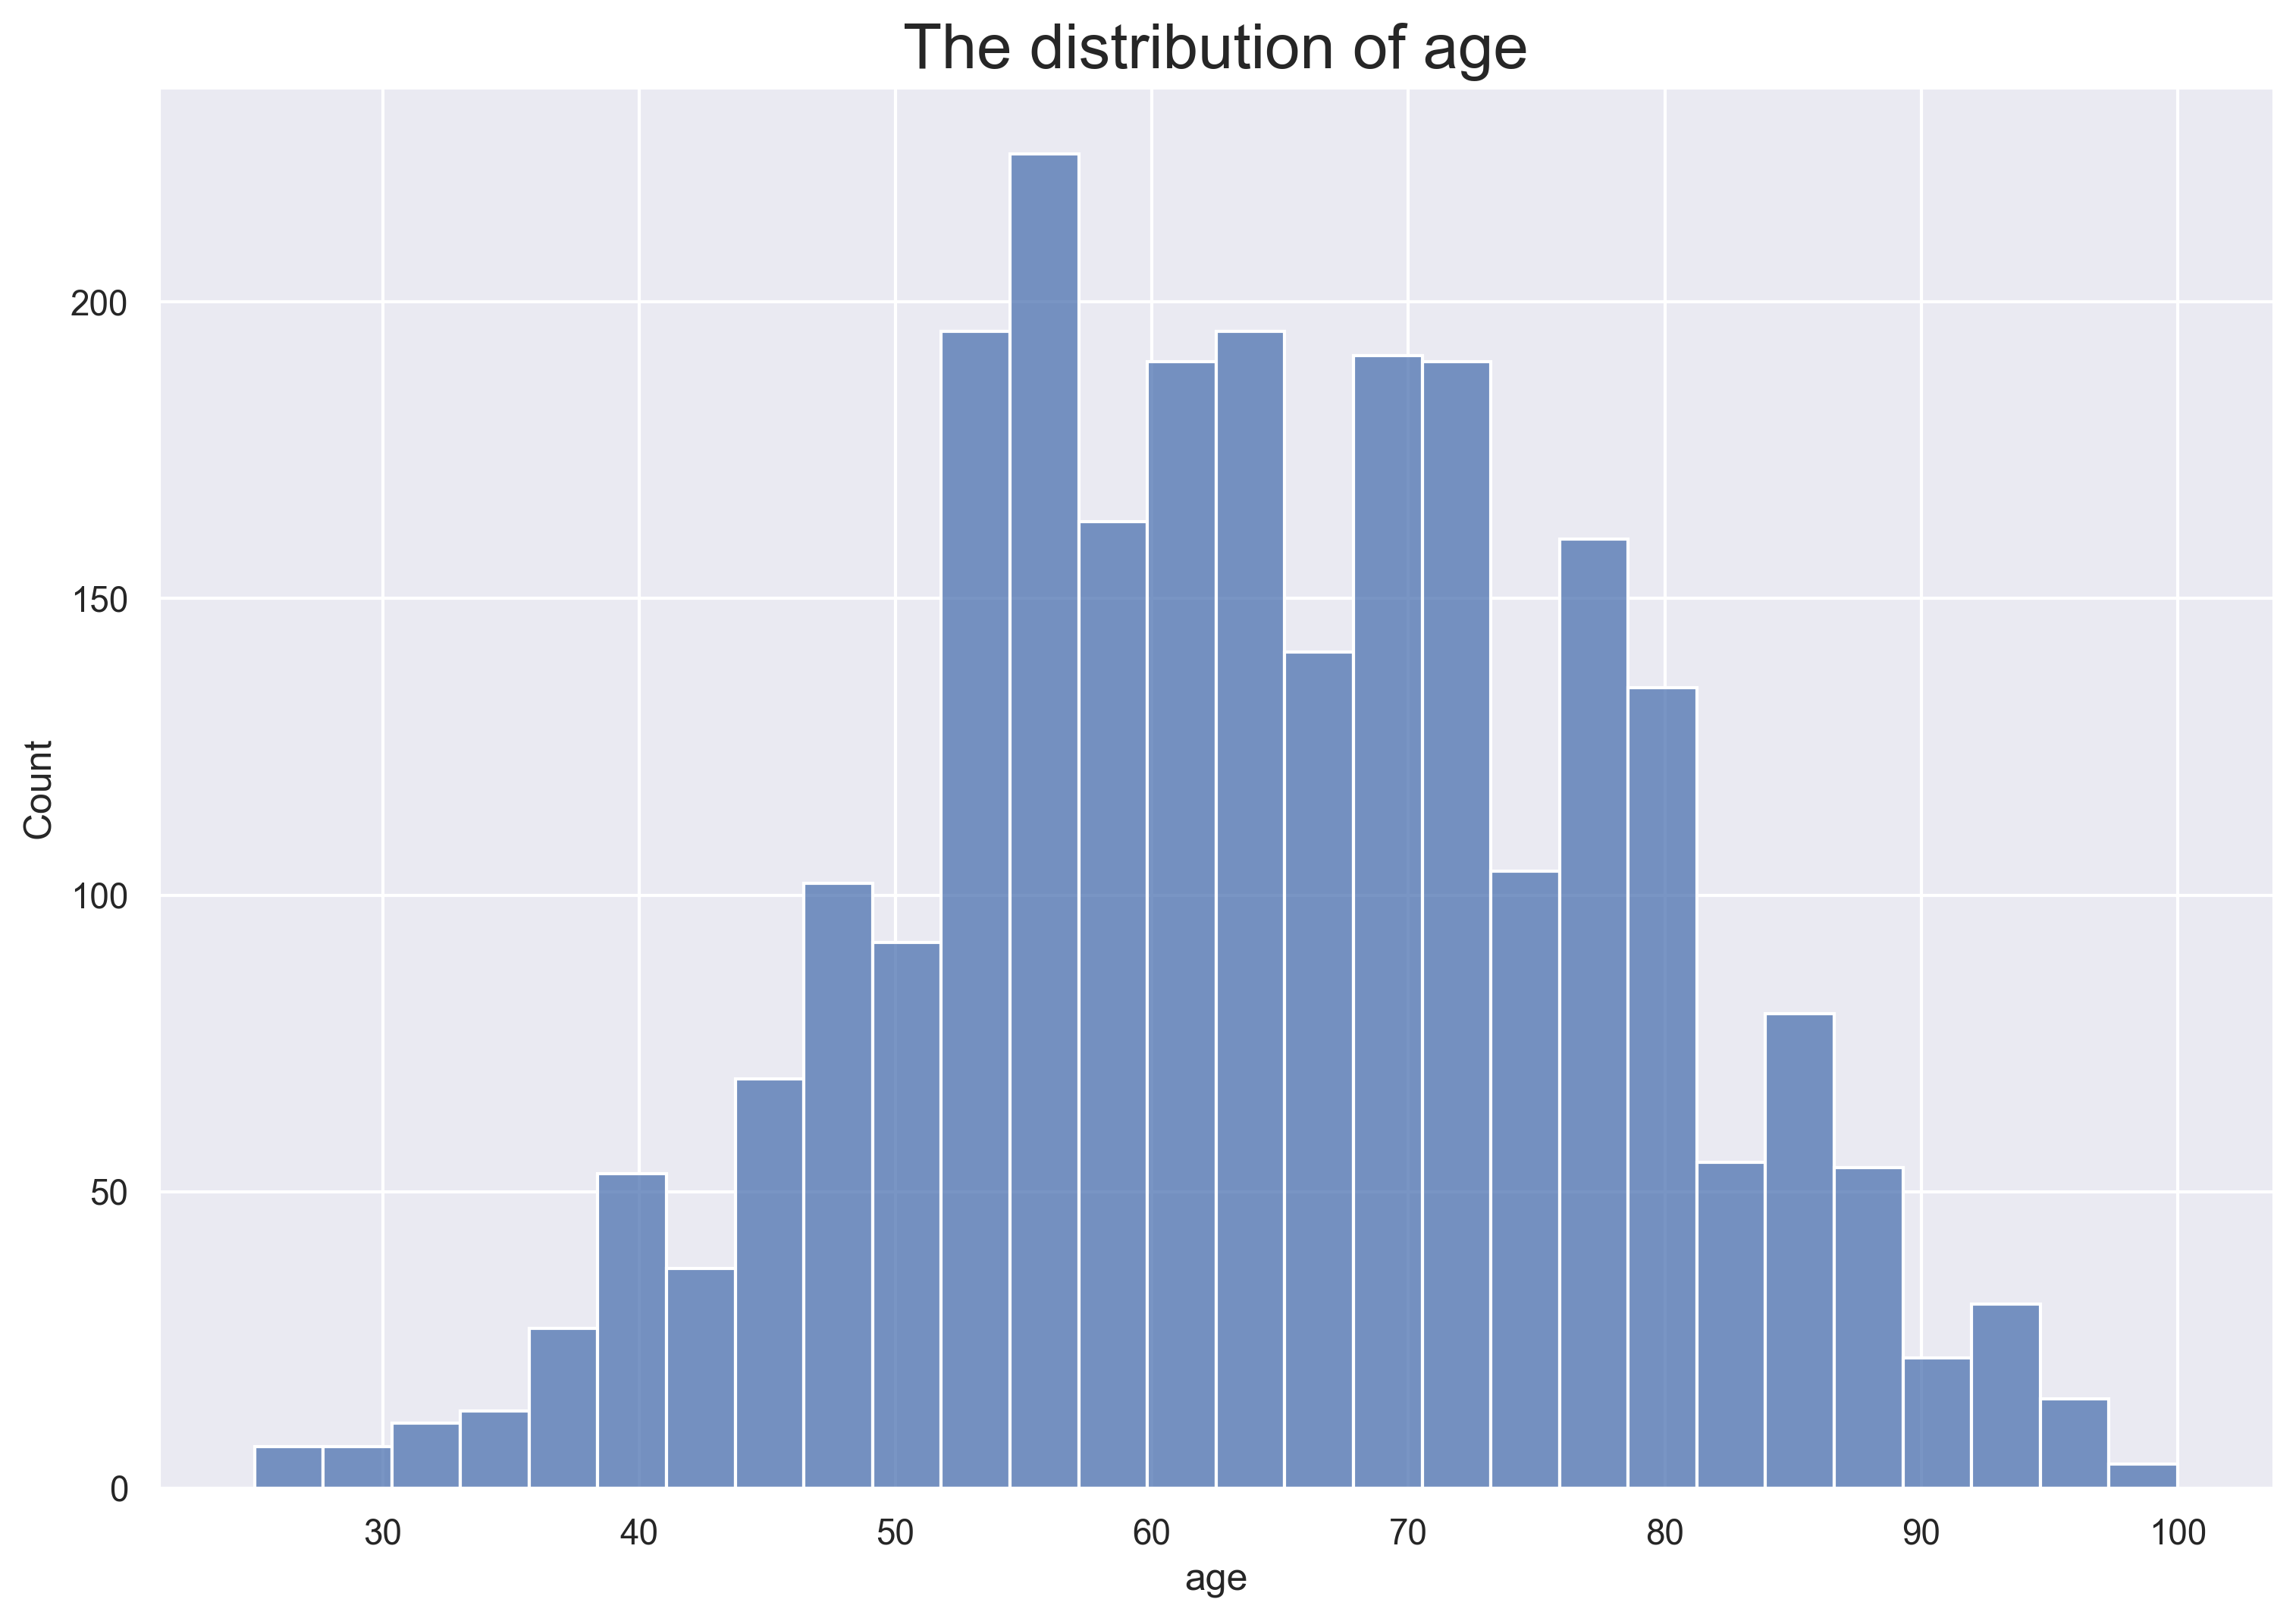

In [69]:
#As you can see, there is no relationship between age and money.


#The distribution of age

#Let's take a look at the distribution of the age column.

sns.histplot(df["age"])
plt.title('The distribution of age', fontsize = 20)
plt.show()